In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
data=pd.read_csv('kc_house_data.csv')

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### EDA

In [4]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

There are no null values in the dataset

<AxesSubplot:xlabel='price'>

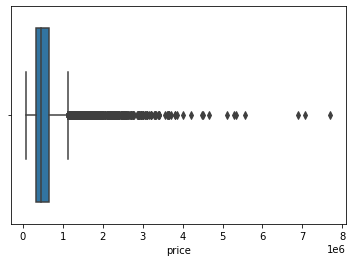

In [6]:
sns.boxplot(data['price'])

<AxesSubplot:xlabel='sqft_living15'>

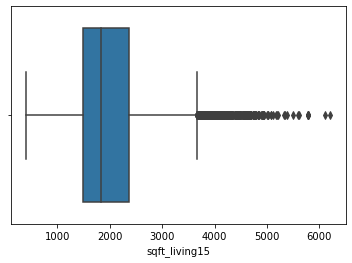

In [7]:
sns.boxplot(data['sqft_living15'])

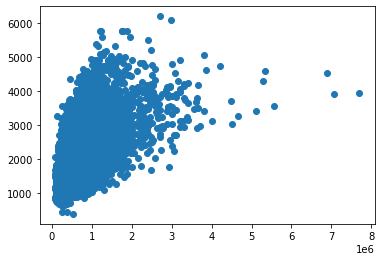

In [8]:
plt.scatter(data['price'],data['sqft_living15'])

There are outliners

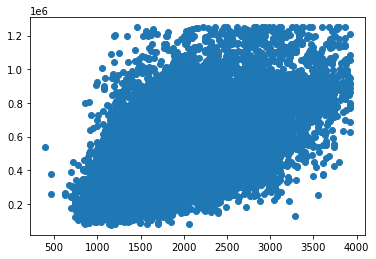

In [39]:
from scipy import stats
data['z_score_price']=stats.zscore(data['price'])
data=data[data['z_score_price'].abs()<=3]
plt.scatter(data['sqft_living15'],data['price'])

<ipython-input-40-0f53620a3979>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['z_score_sqft']=stats.zscore(data['sqft_living15'])


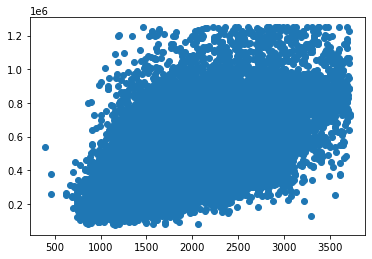

In [40]:
data['z_score_sqft']=stats.zscore(data['sqft_living15'])
data=data[data['z_score_sqft'].abs()<=3]
plt.scatter(data['sqft_living15'],data['price'])

In [11]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score_price,z_score_sqft
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,-0.866717,-0.946609
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,-0.005688,-0.412525
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,-0.980849,1.159207
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,0.174090,-0.916090
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,-0.081958,-0.244670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,-0.490545,-0.656678
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,-0.381588,-0.198892
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,-0.375865,-1.434914
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,-0.381588,-0.839792


### Normalization

In [12]:
def normalize(d):
    min_d=min(d)
    max_d=max(d)
    result=[]
    diff=max_d-min_d
    for i in d:
        result.append((i-min_d)/diff)
    return result

In [13]:
import numpy as np
x=np.array(normalize(data['sqft_living15']))
y=np.array(normalize(data['price']))

### Data split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10)

In [15]:
l=0.1

In [16]:
def y_value(m,c,x):
    y=[]
    for i in x:
        y_v=m*i+c
        y.append(y_v)
    return y

In [17]:
def error(y_actual,y_predicted,batch_size):
    e=[]
    e=(y_actual-y_predicted)
    e=e**2
    e=sum(e)/(2*batch_size)
    return e

In [18]:
def gradient(m,c,y_actual,y_predicted,x,batch_size):
    g_m=(y_actual-y_predicted)*(-1)*x
    g_c=(y_actual-y_predicted)*(-1)
    m=m-l*(g_m.sum()/batch_size)
    c=c-l*(g_c.sum()/batch_size)
    return m,c

In [19]:
def linear_regression_mbgd(batch_size,x,y):
    m=1
    c=-1
    e_list=[]
    for i in range(30):
        for sample in range(0,len(x),batch_size):
            if sample+batch_size>=len(x):
                y_predicted=y_value(m,c,x[sample:])
                y_actual=y[sample:]
                e=error(y_actual,y_predicted,len(y_actual))
                m,c=gradient(m,c,y_actual,y_predicted,x[sample:],len(y_actual))
                e_list.append(e)
                return m,c,e_list
            y_predicted=y_value(m,c,x[sample:(sample+batch_size)])
            y_actual=y[sample:(sample+batch_size)]
            e=error(y_actual,y_predicted,batch_size)
            m,c=gradient(m,c,y_actual,y_predicted,x[sample:(sample+batch_size)],batch_size)
            e_list.append(e)
    return m,c,e_list

### Deploying model for training

In [20]:
m_train,c_train,train_error=linear_regression_mbgd(1000,x_train,y_train)

### Deploying model for testing 

In [21]:
m_test,c_test,test_error=linear_regression_mbgd(1000,x_test,y_test)

In [22]:
def final_error(m,c):
    mse=0
    mae=0
    for i,j in zip(x,y):
        y_predicted=m*i+c
        y_actual=j
        d=y_actual-y_predicted
        mse+=d*d
        mae+=d
    return 0.5*mae,0.5*mse,math.sqrt(0.5*mse)

### Error metrics for training data

In [23]:
mae,mse,rmse=final_error(m_train,c_train)

print("MAE of trained data is "+str(mae))
print("MSE of trained data is "+str(mse))
print("RMSE of trained data is "+str(rmse))

MAE of trained data is 873.9727021104042
MSE of trained data is 423.04193186864654
RMSE of trained data is 20.567983174551813


### Error metrics for testing data

In [24]:
mae,mse,rmse=final_error(m_test,c_test)

print("MAE of trained data is "+str(mae))
print("MSE of trained data is "+str(mse))
print("RMSE of trained data is "+str(rmse))

MAE of trained data is 6034.986521115297
MSE of trained data is 3758.1839538712297
RMSE of trained data is 61.304028855135044


### Predicting on trained data

In [29]:
def predict(x):
    min_d=min(data['sqft_living15'])
    max_d=max(data['sqft_living15'])
    diff=max_d-min_d
    x=(x-min_d)/diff
    y=m_train*x+c_train
    y=(y*(max(data['price'])-min(data['price'])))+min(data['price'])
    return y

In [33]:
predict(2000)

405586.5573928753

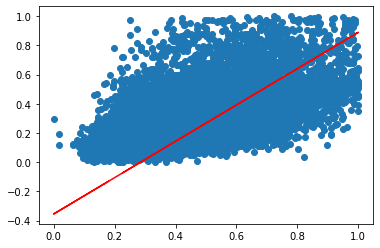

In [42]:
plt.scatter(x,y)
plt.plot(x_train,m_train*x_train+c_train,color='red')